## 23.01.02 identical oscillator 시각화.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.For_ensemble.for_221220 import get_tr2
from TO_sim.Utility import Create_Folder
import re
DF = 'Review/23.01.02 identical oscillator 시각화/'
Create_Folder(DF)

In [2]:
ts,rs = {},{}

In [3]:
m = 0
K = 1
seed = 0
N = 500
dt = 0.01
initial_frequecny = 0
theta_s = {}
ms = [0,0.95,2,6]

dtheta_dist = 'Normal\n(Deterministic)'
# dtheta_dist = 'Normal'
init_dist = Identical(N, 0, seed=seed)
theta_init, omega_init, Kc = init_dist
resub = re.sub("\n","",dtheta_dist)
dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,0,1,seed=seed+3)
np.sort(dtheta_init)


theta_s = {}
for m in ms:
    ts[m],rs[m],(theta_s[m],dtheta_s,omega) = get_tr2(m,K=K,init_dist=init_dist,dtheta_init=dtheta_init,dt =dt,t_end=100)

In [85]:
m = 0
K = 1
seed = 0
N = 500
dt = 0.01
initial_frequecny = 0
theta_s = {}
ms = [0,1,2,3,4,5,6]

dtheta_dist = 'Normal\n(Deterministic)'
# dtheta_dist = 'Normal'
init_dist = Identical(N, 0, seed=seed)
theta_init, omega_init, Kc = init_dist
resub = re.sub("\n","",dtheta_dist)
dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,0,1,seed=seed+3)
np.sort(dtheta_init)
theta_s_K = {} 
Ks = [0.5,1,2]
for K in Ks:
    theta_s = {}
    for m in ms:
        ts[m],rs[m],(theta_s[m],dtheta_s,omega) = get_tr2(m,K=K,init_dist=init_dist,dtheta_init=dtheta_init,dt =dt,t_end=100)
    theta_s_K[K] = theta_s

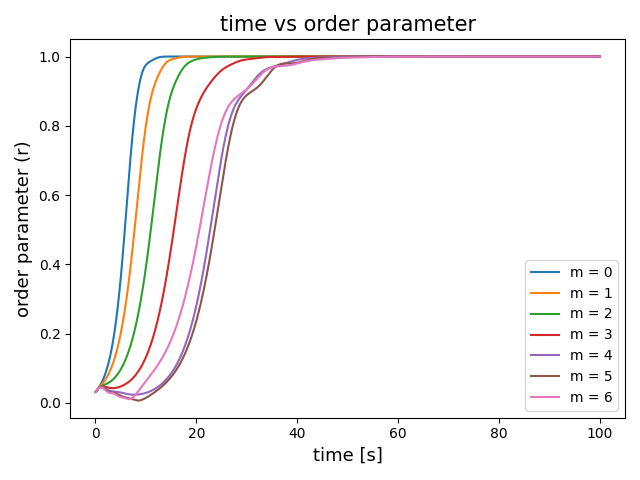

In [70]:
# ms = [0,0.95,2,6]
plt.figure(facecolor ='white')
for m in ms:
    plt.plot(ts[m],rs[m],label=f'm = {m}')
plt.legend()
plt.xlabel('time [s]',fontsize=13)
plt.ylabel('order parameter (r)',fontsize=13)
plt.title('time vs order parameter',fontsize=15)
plt.tight_layout()
plt.savefig(DF+f't vs r m ={ms}.png',dpi=400)

In [130]:
np.max(theta_s),np.min(theta_s)

(17.986259599614183, -15.875975659086945)

In [207]:
if m == 0:
    dtheta_s = np.diff(theta_s/dt,axis=0)
    dtheta_s = np.pad(dtheta_s,((0,1),(0,0)),'edge')

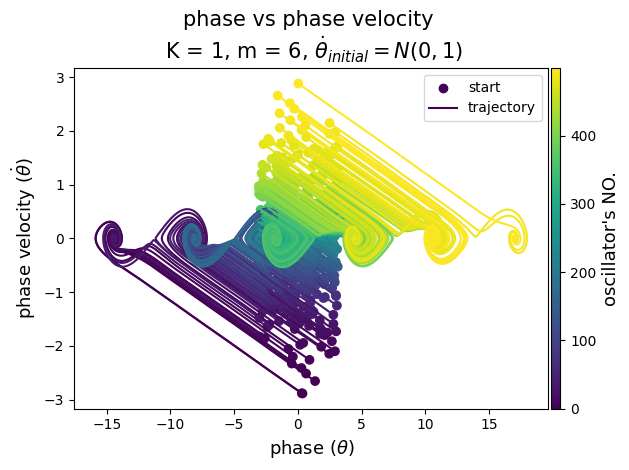

In [167]:
sorted_idx = np.argsort(dtheta_init)
color_ = np.linspace(0,1,len(dtheta_init))
color = plt.cm.viridis(color_)
fig = plt.figure(facecolor='white')
# plt.scatter(0*dtheta_init,0*dtheta_init,c=np.arange(len(color_)),s=0)
sca = plt.scatter(theta_s[0,:],dtheta_s[0,:],c=np.arange(len(color_)))
ax = plt.gca()
plt.scatter(theta_s[0,0],dtheta_s[0,0],color=color[0],label ='start')
plt.plot(theta_s[:,0],dtheta_s[:,0],color=color[0],label ='trajectory')

for i in sorted_idx:
    plt.plot(theta_s[:,i],dtheta_s[:,i],color=color[i]);
# plt.scatter(theta_s[:,10],dtheta_s[:,10],c=t)
plt.xlabel(r'phase ($\theta$)',fontsize=13)
plt.ylabel(r'phase velocity ($\dot{\theta}$)',fontsize=13)
plt.title(f'phase vs phase velocity \n K = {K}, m = {m}, '+r'$\dot{\theta}_{initial}=N(0,1)$',fontsize=15)
plt.legend()
divider3 = make_axes_locatable(ax)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax)
cbar.set_label('oscillator\'s NO.',fontsize=13)
plt.tight_layout()
plt.savefig(DF+f'phase diagram K = {K} m = {m}, initial_dtheta={resub}.png',dpi =400)

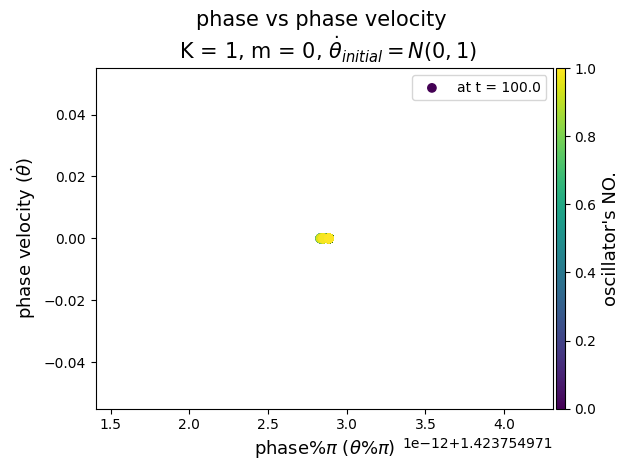

In [208]:
plt.figure(facecolor='white')
ax = plt.gca()
sca = plt.scatter(theta_s[-1,:]%(np.pi),dtheta_s[-1,:],color=color,label =f'at t = {t[-1]}')

plt.xlabel(r'phase%$\pi$ ($\theta$%$\pi$)',fontsize=13)
plt.ylabel(r'phase velocity ($\dot{\theta}$)',fontsize=13)
plt.title(f'phase vs phase velocity \n K = {K}, m = {m}, '+r'$\dot{\theta}_{initial}=N(0,1)$',fontsize=15)
plt.legend()
divider3 = make_axes_locatable(ax)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax)
cbar.set_label('oscillator\'s NO.',fontsize=13)
plt.tight_layout()
plt.savefig(DF+f'last phase space K = {K} m = {m}, initial_dtheta={resub}.png',dpi =400)

In [185]:
t[-1]

100.0

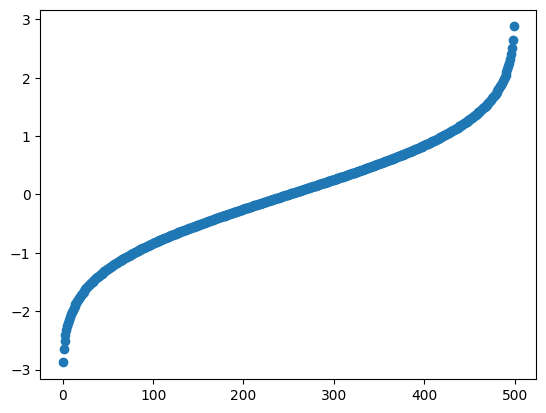

In [49]:
plt.scatter(np.arange(len(dtheta_init)),dtheta_init)

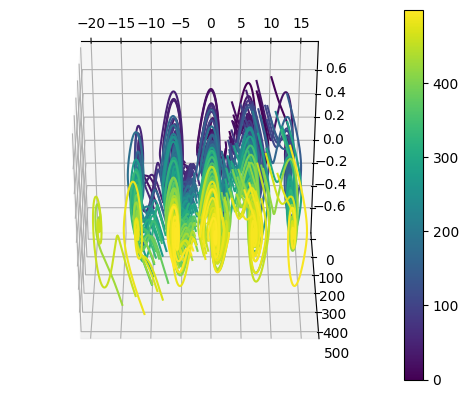

In [63]:
color_ = np.linspace(0,1,len(dtheta_init))
color = plt.cm.viridis(color_)
ax = plt.subplot(projection='3d')
plt.scatter(0*dtheta_init,0*dtheta_init,c=np.arange(len(color_)),s=0)


for i in range(len(dtheta_init)):
    ax.plot(theta_s[800:,i],dtheta_s[800:,i],zs=[i],color=color[i]);
# plt.scatter(theta_s[:,10],dtheta_s[:,10],c=t)
ax.view_init(elev = 125,azim = -90)

plt.colorbar()

# EX. interactive graph

In [36]:
# if running this code in a Jupter notbeook or JupyterLab
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = ax.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [20]:
len(t)

1000

In [40]:
theta_s.keys()

dict_keys([0, 0.95, 2, 6])

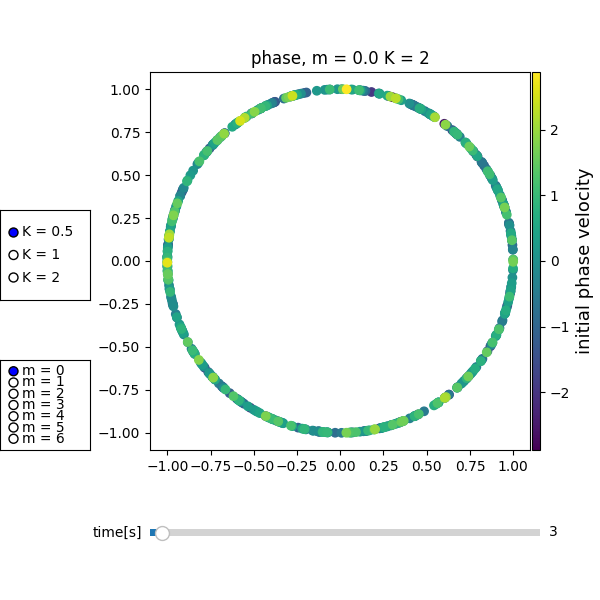

In [87]:
# plt.figure(figsize=(6,6))
fig, ax = plt.subplots(figsize=(6,6))
fig.subplots_adjust(left=0.25, bottom=0.25)
sca = ax.scatter(np.sin(theta_s_K[K][m][0,:]),np.cos(theta_s_K[K][m][0,:]),c=dtheta_init)
m_dict = {}
for m in ms:
    m_dict[f'm = {m}'] = m
K_dict = {}
for K in Ks:
    K_dict[f'K = {K}'] = K
axtime = fig.add_axes([0.25, 0.1, 0.65, 0.025])
time = Slider(
    ax=axtime,
    label='time[s]',
    valmin=0,
    valmax=100,
    valinit=init_frequency,
)
axm = fig.add_axes([0.0, 0.25, 0.15, 0.15])
axK = fig.add_axes([0.0, 0.50, 0.15, 0.15])
radio_m = RadioButtons(axm, (m_dict.keys()), active=0)
radio_K = RadioButtons(axK, (K_dict.keys()), active=0)
radio_m_val = float(m_dict[radio_m.value_selected])
radio_K_val = float(K_dict[radio_K.value_selected])

ax.set_title(f'phase, m = {radio_m_val} K = {K}')

# The function to be called anytime a slider's value changes
def update(val):
    radio_m_val = float(m_dict[radio_m.value_selected])
    radio_K_val = float(K_dict[radio_K.value_selected])
    sca.set_offsets(np.c_[np.sin(theta_s_K[radio_K_val][radio_m_val][int(100*time.val)]), np.cos(theta_s_K[radio_K_val][radio_m_val][int(100*time.val)])])
    ax.set_title(f'phase, m = {radio_m_val} K = {radio_K_val}')
    fig.canvas.draw_idle()

divider3 = make_axes_locatable(ax)
cax = divider3.append_axes("right", size="2%", pad="0.5%")
cbar =plt.colorbar(sca, cax=cax)
cbar.set_label('initial phase velocity',fontsize=13)
# register the update function with each slider
time.on_changed(update)
radio_m.on_clicked(update)
radio_K.on_clicked(update)
# sca.set_offsets(np.c_[np.sin(theta_s[i]), np.cos(theta_s[i])])
plt.show()

In [47]:
radio.value_selected

'2'

In [84]:
for i in range(20):
    plt.close()

In [23]:
sca.set_offsets(np.c_[np.sin(theta_s[i]), np.cos(theta_s[i])])

NameError: name 'i' is not defined

## 22.01.03 time vs phase

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm import tqdm
import parmap
from TO_sim.Hysteresis_Kuramoto import *
from TO_sim.gen_Distribution import *
from TO_sim.For_ensemble.for_221220 import get_tr2
from TO_sim.Utility import Create_Folder
import re
DF = 'Review/23.01.02 identical oscillator 시각화/'
Create_Folder(DF)
ts,rs = {},{}
m = 0
K = 1
seed = 0
N = 500
t_end = 100
dt = 0.01
initial_frequecny = 0
theta_s = {}
ms = [0,0.95,2,6,12,24]

dtheta_dist = 'Normal\n(Deterministic)'
# dtheta_dist = 'Identical'
init_dist = Identical(N, 0, seed=seed)
theta_init, omega_init, Kc = init_dist
resub = re.sub("\n","",dtheta_dist)
dists = {'Lorentzian\n(Deterministic)':Quantile_Lorentzian,'Normal\n(Deterministic)':Quantile_Normal,
        'Lorentzian':Lorentzian,'Normal':Normal,'Identical':Identical}
_,dtheta_init,_ = dists[dtheta_dist](N,0,1,seed=seed+3)
np.sort(dtheta_init)


theta_s = {}
for m in ms:
    ts[m],rs[m],(theta_s[m],dtheta_s,omega) = get_tr2(m,K=K,init_dist=init_dist,dtheta_init=dtheta_init,dt =dt,t_end=t_end)

In [35]:
ts[m][0].shape

()

In [77]:
DFF = DF+f'{resub}/'
Create_Folder(DFF)

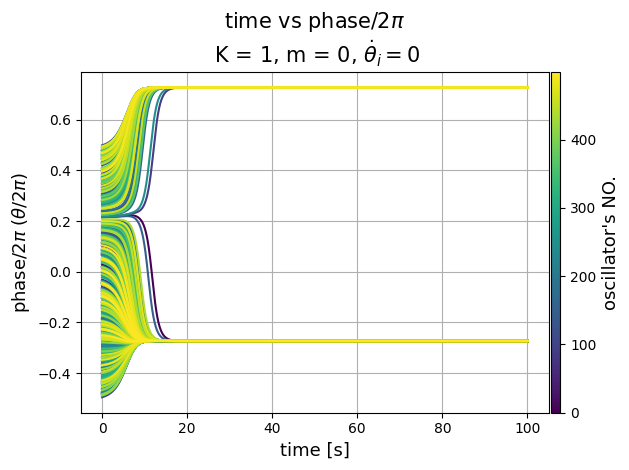

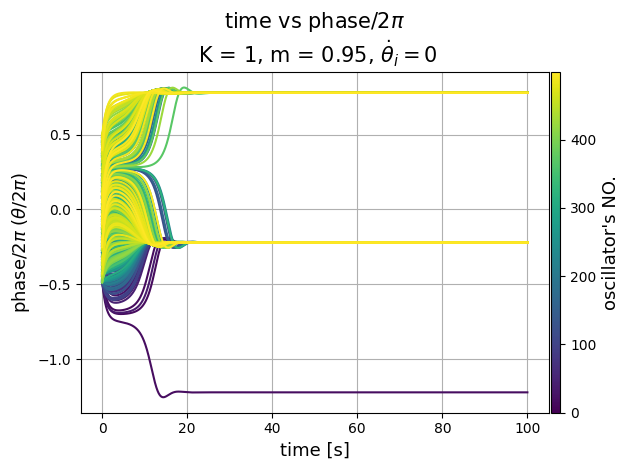

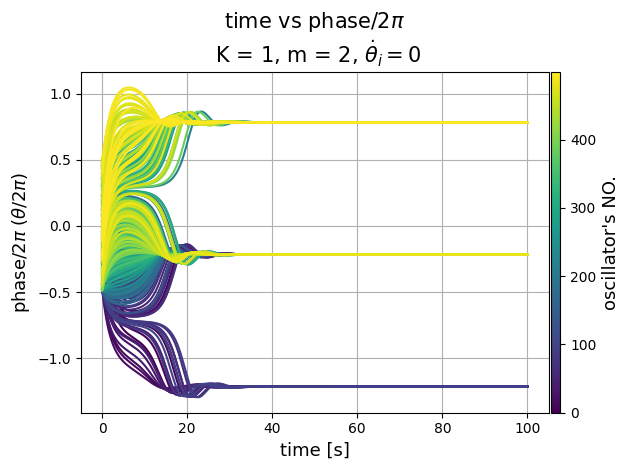

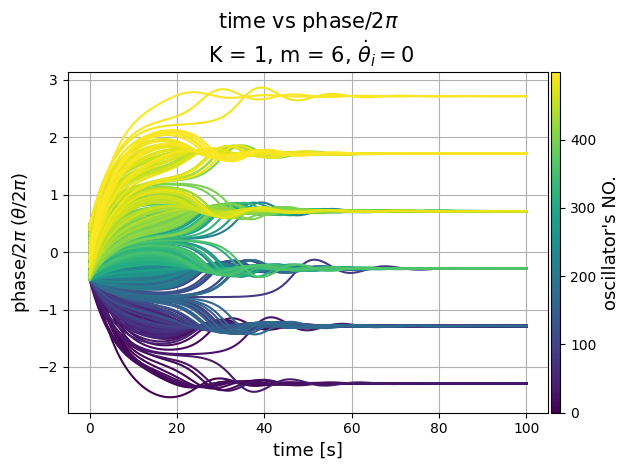

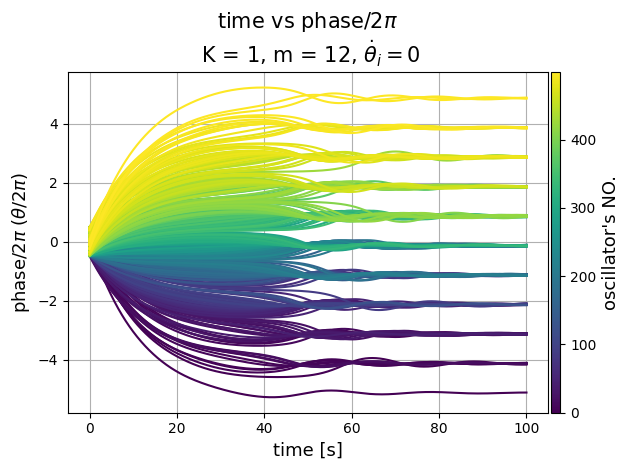

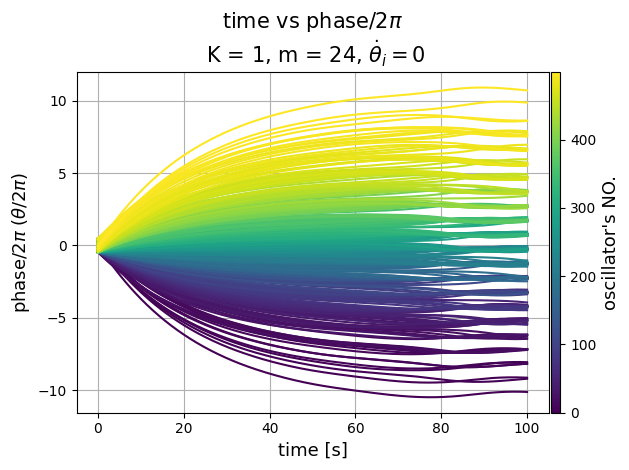

In [78]:
m =0
for m in ms:
    sorted_idx = np.argsort(dtheta_init)
    color_ = np.linspace(0,1,len(dtheta_init))
    color = plt.cm.viridis(color_)
    fig = plt.figure(facecolor='white')
    # plt.scatter(0*dtheta_init,0*dtheta_init,c=np.arange(len(color_)),s=0)
    sca = plt.scatter(0*np.zeros(N),theta_s[m][0]/(2*np.pi),c=np.arange(len(color_)),s=0)
    ax = plt.gca()
    # plt.scatter(theta_s[m][0,0],dtheta_s[0,0],color=color[0],label ='start')
    # plt.plot(theta_s[m][:,0],dtheta_s[:,0],color=color[0],label ='trajectory')

    for i in sorted_idx:
        plt.plot(ts[m],theta_s[m][:,i]/(2*np.pi),color=color[i]);
        # plt.plot(theta_s[:,i],dtheta_s[:,i],color=color[i]);
    # plt.scatter(theta_s[:,10],dtheta_s[:,10],c=t)
    plt.grid()
    plt.xlabel('time [s]',fontsize=13)
    plt.ylabel(r'phase$/2\pi$ ($\theta/2\pi$)',fontsize=13)
    # plt.title(f'phase vs phase velocity \n K = {K}, m = {m}, '+r'$\dot{\theta}_{initial}=N(0,1)$',fontsize=15)
    plt.title(f'time vs phase$/2\pi$ \n K = {K}, m = {m}, '+r'$\dot{\theta}_{i}=0$',fontsize=15)
    # plt.legend()
    divider3 = make_axes_locatable(ax)
    cax = divider3.append_axes("right", size="2%", pad="0.5%")
    cbar =plt.colorbar(sca, cax=cax)
    cbar.set_label('oscillator\'s NO.',fontsize=13)
    plt.tight_layout()
    plt.savefig(DFF+f'time vs phase K = {K} m = {m}, initial_dtheta={resub}.png',dpi =400)

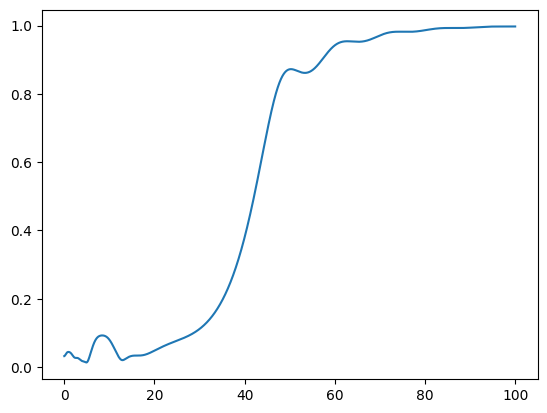

In [60]:
plt.plot(ts[m],rs[m])

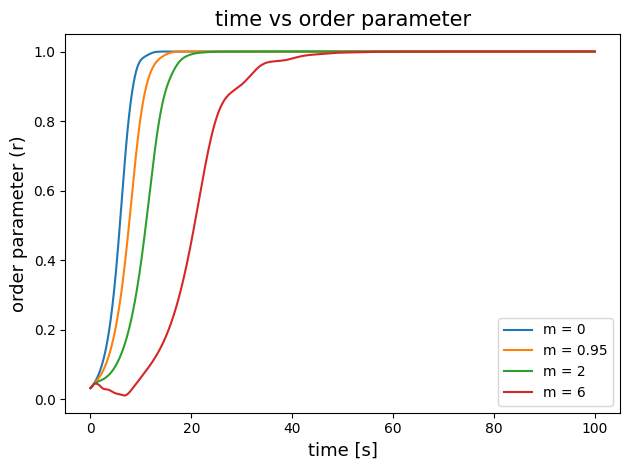

In [79]:
ms = [0,0.95,2,6]
plt.figure(facecolor ='white')
for m in ms:
    plt.plot(ts[m],rs[m],label=f'm = {m}')
plt.legend()
plt.xlabel('time [s]',fontsize=13)
plt.ylabel('order parameter (r)',fontsize=13)
plt.title('time vs order parameter',fontsize=15)
plt.tight_layout()
plt.savefig(DFF+f'dist = {resub}, t vs r m ={ms}.png',dpi=400)

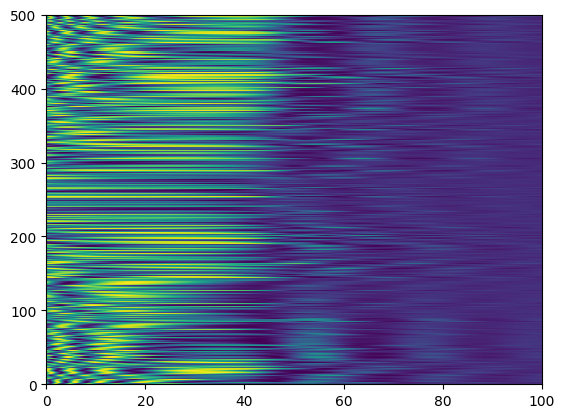

In [59]:
m = 12
plt.imshow(np.sin(theta_s[m]).T,origin='lower',aspect='auto',extent=[0,t_end,0,N])